In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper. Automatically map existing table.
#Use automap base instead of the declarative base when the database already exists.

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [3]:
# create engine to connect hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables. sql will read all tables and figure out all the classes.
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base. There are 2 classes
Base.classes.keys()

['measurement', 'station']

In [5]:
# Map Measurement class and Station class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
# Display the row's columns and data in dictionary format. We get the dictionary with the first row. 
first_row_M = session.query(Measurement).first()
first_row_M.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9506c5c410>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [8]:
first_row_S = session.query(Station).first()
first_row_S.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9506ba7c50>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [9]:
#I can also use the inspector to get the data type and column names 
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
table=inspector.get_table_names()[0]

In [12]:
for table in inspector.get_table_names():
    print(f'Table name:', table)
    columns = inspector.get_columns(table)
    print(columns)
    for column in columns:
        print(column["name"], column["type"])

Table name: measurement
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Table name: station
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_

In [13]:
#get an idea of all the data in the table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
# Find the most recent date in the data set.
Most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Most_recent_date

('2017-08-23')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#First calculate a year back of data from the most recent date using datetime. Datetime returns a datetime date 
#SQLAlchemy doesn't support data type.
query_date = dt.date(2017, 8, 23) - dt.timedelta(weeks = 52)
new_date=query_date.strftime('%Y-%m-%d')
new_date


'2016-08-24'

In [17]:

# After calculating the date one year from the last date in data set, build a query to retrieve dates and precipitation
#scores

date_precipitations = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date < '2017-08-23').filter(
    Measurement.date > '2016-08-24').order_by(Measurement.date).all()

date_precipitations

[('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', None),
 ('2016-08-31', None),
 ('2016-08-31', 0.25),
 ('2016-08-31', 0.24),
 ('

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_precipitations_df= pd.DataFrame(date_precipitations, columns=['Date', 'Precipitation'])
date_precipitations_df.set_index(date_precipitations_df['Date'], inplace=True)
date_precipitations_df

,Date,Precipitation
Date,,
2016-08-25,2016-08-25,0.08
2016-08-25,2016-08-25,0.08
2016-08-25,2016-08-25,0.00
2016-08-25,2016-08-25,0.00
2016-08-25,2016-08-25,0.21
...,...,...
2017-08-21,2017-08-21,NaN
2017-08-21,2017-08-21,0.56
2017-08-22,2017-08-22,0.00


In [19]:
del date_precipitations_df['Date']

In [20]:
date_precipitations_df

,Precipitation
Date,
2016-08-25,0.08
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.00
2016-08-25,0.21
...,...
2017-08-21,NaN
2017-08-21,0.56
2017-08-22,0.00


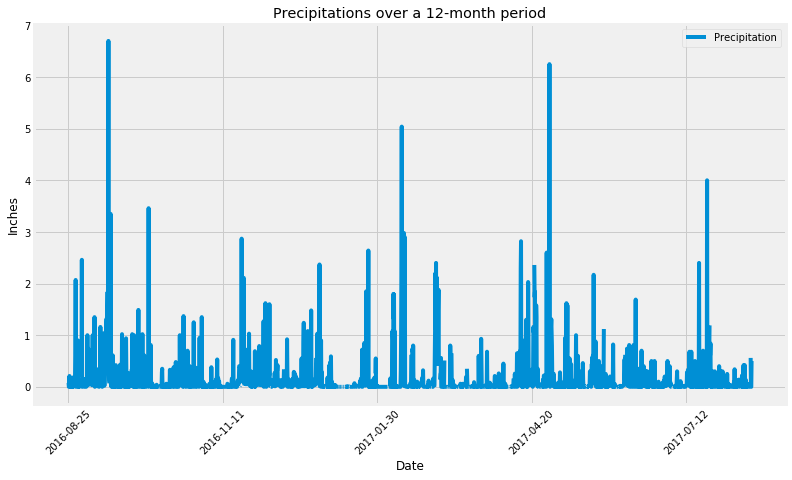

In [21]:
#Plot the results
ax=date_precipitations_df.plot(kind='line', title ='Precipitations over a 12-month period', figsize=(12,7))
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Inches')
plt.savefig('Precipitations over a 12 month period.png')

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data using describe method. 
#Could have done the same with numpy and scypy for standard dev
new_index_df=date_precipitations_df.reset_index()
new_index_df

,Date,Precipitation
0,2016-08-25,0.08
1,2016-08-25,0.08
2,2016-08-25,0.00
3,2016-08-25,0.00
4,2016-08-25,0.21
...,...,...
2207,2017-08-21,NaN
2208,2017-08-21,0.56
2209,2017-08-22,0.00
2210,2017-08-22,0.00


In [23]:
new_index_df['Date']=new_index_df['Date'].astype('datetime64[ns]')
new_index_df

,Date,Precipitation
0,2016-08-25,0.08
1,2016-08-25,0.08
2,2016-08-25,0.00
3,2016-08-25,0.00
4,2016-08-25,0.21
...,...,...
2207,2017-08-21,NaN
2208,2017-08-21,0.56
2209,2017-08-22,0.00
2210,2017-08-22,0.00


In [24]:
new_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2212 non-null   datetime64[ns]
 1   Precipitation  2005 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.7 KB


In [25]:
new_index_df['Months']=new_index_df['Date'].dt.to_period('M')
new_index_df

,Date,Precipitation,Months
0,2016-08-25,0.08,2016-08
1,2016-08-25,0.08,2016-08
2,2016-08-25,0.00,2016-08
3,2016-08-25,0.00,2016-08
4,2016-08-25,0.21,2016-08
...,...,...,...
2207,2017-08-21,NaN,2017-08
2208,2017-08-21,0.56,2017-08
2209,2017-08-22,0.00,2017-08
2210,2017-08-22,0.00,2017-08


In [26]:
grouped_df=new_index_df.groupby('Months')['Precipitation'].agg(['mean', 'median', 'var', 'std', 'sem'])

In [27]:
renamed_df=grouped_df.rename(columns={'mean': 'Mean','median':"Median", 'var': 'Variance', 'std': 'Std','sem':'Standard_Error'})
renamed_df

,Mean,Median,Variance,Std,Standard_Error
Months,,,,,
2016-08,0.213902,0.05,0.252879,0.502871,0.078535
2016-09,0.285549,0.07,0.438527,0.662214,0.050347
2016-10,0.121620,0.01,0.118893,0.344809,0.025772
2016-11,0.120234,0.02,0.117440,0.342695,0.026207
2016-12,0.199494,0.06,0.117626,0.342967,0.025706
2017-01,0.070294,0.00,0.076202,0.276047,0.021172
2017-02,0.241111,0.00,0.452824,0.672922,0.052870
2017-03,0.175266,0.00,0.185904,0.431165,0.033167
2017-04,0.321111,0.02,0.493463,0.702469,0.053719


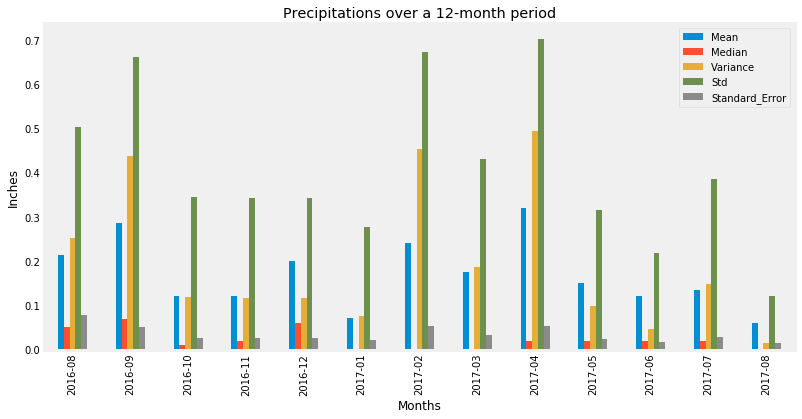

In [28]:
renamed_df.plot(kind='bar', title ='Precipitations over a 12-month period', figsize=(12,6))
plt.ylabel("Inches" )
plt.xlabel("Months")
plt.grid()
plt.savefig('Precipitations over 12 months period_Summary Statistics.png')

# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(Measurement.station).all()
set(stations)

{('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')}

In [30]:
#With the len function, count the unique occurencies. there are 9 stations.
stations_number=len(set(stations))
stations_number

9

In [31]:
#2 way
#Calculate the total number of stations
session.query(Station.id).count()

9

In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# Most active station with the hightest number of observations is USC00519281 with 2772

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
 
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

# YOUR CODE HERE
station_most_measurements= session.query(*sel).filter(Measurement.station == 'USC00519281').all()
station_most_measurements

# Lowest TOBS 54.0,  Highest TOBS 85.0, AVG TOBS 71.66378066378067 of station N USC00519281

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [34]:
# Using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram

date_tobs = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date < '2017-08-23').filter(
    Measurement.date > '2016-08-24').order_by(Measurement.date).all()
date_tobs


[('2016-08-25', 0.06, 80.0),
 ('2016-08-26', 0.01, 80.0),
 ('2016-08-27', 0.12, 75.0),
 ('2016-08-28', 0.6, 73.0),
 ('2016-08-29', 0.35, 78.0),
 ('2016-08-30', 0.0, 77.0),
 ('2016-08-31', 0.24, 78.0),
 ('2016-09-01', 0.02, 80.0),
 ('2016-09-02', 0.01, 80.0),
 ('2016-09-03', 0.12, 78.0),
 ('2016-09-04', 0.14, 78.0),
 ('2016-09-05', 0.03, 78.0),
 ('2016-09-06', 0.11, 73.0),
 ('2016-09-07', 0.16, 74.0),
 ('2016-09-08', 0.07, 80.0),
 ('2016-09-09', 0.16, 79.0),
 ('2016-09-10', 0.09, 77.0),
 ('2016-09-11', 0.3, 80.0),
 ('2016-09-12', 0.31, 76.0),
 ('2016-09-13', 0.34, 79.0),
 ('2016-09-14', 2.33, 75.0),
 ('2016-09-15', 0.83, 79.0),
 ('2016-09-16', 0.06, 78.0),
 ('2016-09-17', 0.36, 79.0),
 ('2016-09-18', 0.07, 78.0),
 ('2016-09-19', 0.01, 78.0),
 ('2016-09-20', 0.22, 76.0),
 ('2016-09-21', 0.07, 74.0),
 ('2016-09-22', 0.34, 77.0),
 ('2016-09-23', 0.94, 78.0),
 ('2016-09-24', 0.01, 79.0),
 ('2016-09-25', 0.03, 79.0),
 ('2016-09-26', 0.17, 77.0),
 ('2016-09-27', 0.17, 80.0),
 ('2016-09-28', 0

In [35]:
date_tobs_df= pd.DataFrame(date_tobs, columns=['Date', 'Precipitations', 'Temperature'])
date_tobs_df

,Date,Precipitations,Temperature
0,2016-08-25,0.06,80.0
1,2016-08-26,0.01,80.0
2,2016-08-27,0.12,75.0
3,2016-08-28,0.60,73.0
4,2016-08-29,0.35,78.0
...,...,...,...
345,2017-08-14,0.00,77.0
346,2017-08-15,0.32,77.0
347,2017-08-16,0.12,76.0
348,2017-08-17,0.01,76.0


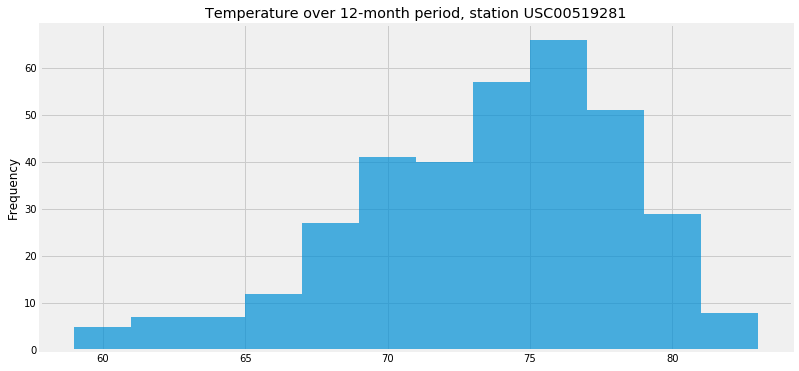

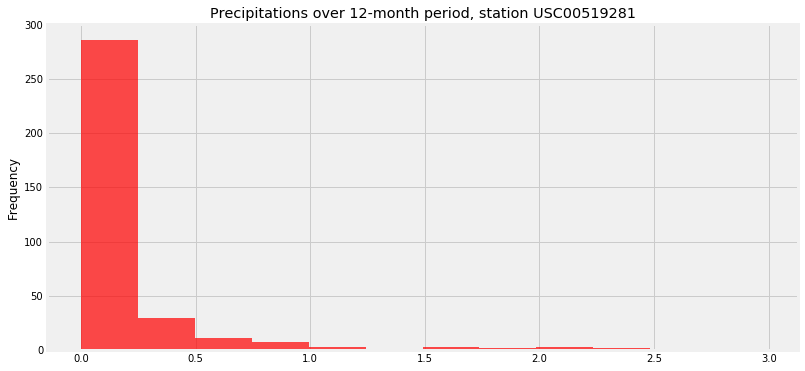

In [43]:
date_tobs_df.Temperature.plot(kind='hist', title='Temperature over 12-month period, station USC00519281', bins=12,alpha=0.7, figsize=(12,6))
plt.savefig('Temperature over 12-month period, station USC00519281')
plt.show()
date_tobs_df.Precipitations.plot(kind='hist', title='Precipitations over 12-month period, station USC00519281', bins=12,alpha=0.7,color='red', figsize=(12,6))
plt.savefig('Precipitations over 12-month period, station USC00519281')
plt.show()

In [37]:
date_tobs_df['Months']=pd.DatetimeIndex(date_tobs_df['Date']).month
date_tobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            350 non-null    object 
 1   Precipitations  350 non-null    float64
 2   Temperature     350 non-null    float64
 3   Months          350 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 11.1+ KB


<Figure size 864x432 with 0 Axes>

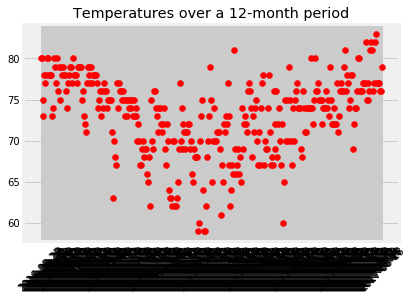

<Figure size 864x432 with 0 Axes>

In [38]:
#Distribution of temperatures for station USC00519281
x=date_tobs_df['Date']
y=date_tobs_df['Temperature']
plt.scatter(x,y, color='red')
plt.xticks(rotation = 45)
plt.title('Temperatures over a 12-month period')
plt.figure(figsize=(12,6)) 

In [39]:
#Analyzing the whole dataset, not just one station
date_tobs = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date < '2017-08-23').filter(
    Measurement.date > '2016-08-24').order_by(Measurement.date).all()
date_tobs

[('USC00519397', '2016-08-25', 0.08, 80.0),
 ('USC00513117', '2016-08-25', 0.08, 77.0),
 ('USC00514830', '2016-08-25', 0.0, 81.0),
 ('USC00517948', '2016-08-25', 0.0, 81.0),
 ('USC00519523', '2016-08-25', 0.21, 80.0),
 ('USC00519281', '2016-08-25', 0.06, 80.0),
 ('USC00516128', '2016-08-25', 0.11, 77.0),
 ('USC00519397', '2016-08-26', 0.0, 79.0),
 ('USC00513117', '2016-08-26', 0.03, 78.0),
 ('USC00514830', '2016-08-26', 0.02, 81.0),
 ('USC00517948', '2016-08-26', 0.04, 81.0),
 ('USC00519523', '2016-08-26', 0.0, 84.0),
 ('USC00519281', '2016-08-26', 0.01, 80.0),
 ('USC00519397', '2016-08-27', 0.0, 77.0),
 ('USC00513117', '2016-08-27', 0.18, 73.0),
 ('USC00514830', '2016-08-27', 0.02, 81.0),
 ('USC00519523', '2016-08-27', 0.0, 81.0),
 ('USC00519281', '2016-08-27', 0.12, 75.0),
 ('USC00516128', '2016-08-27', None, 74.0),
 ('USC00519397', '2016-08-28', 0.01, 78.0),
 ('USC00513117', '2016-08-28', 0.14, 73.0),
 ('USC00514830', '2016-08-28', 0.14, 81.0),
 ('USC00519523', '2016-08-28', 0.14, 8

In [40]:
date_tobs_total_df= pd.DataFrame(date_tobs, columns=['Station','Date', 'Precipitations', 'Temperature'])
del date_tobs_total_df['Precipitations']

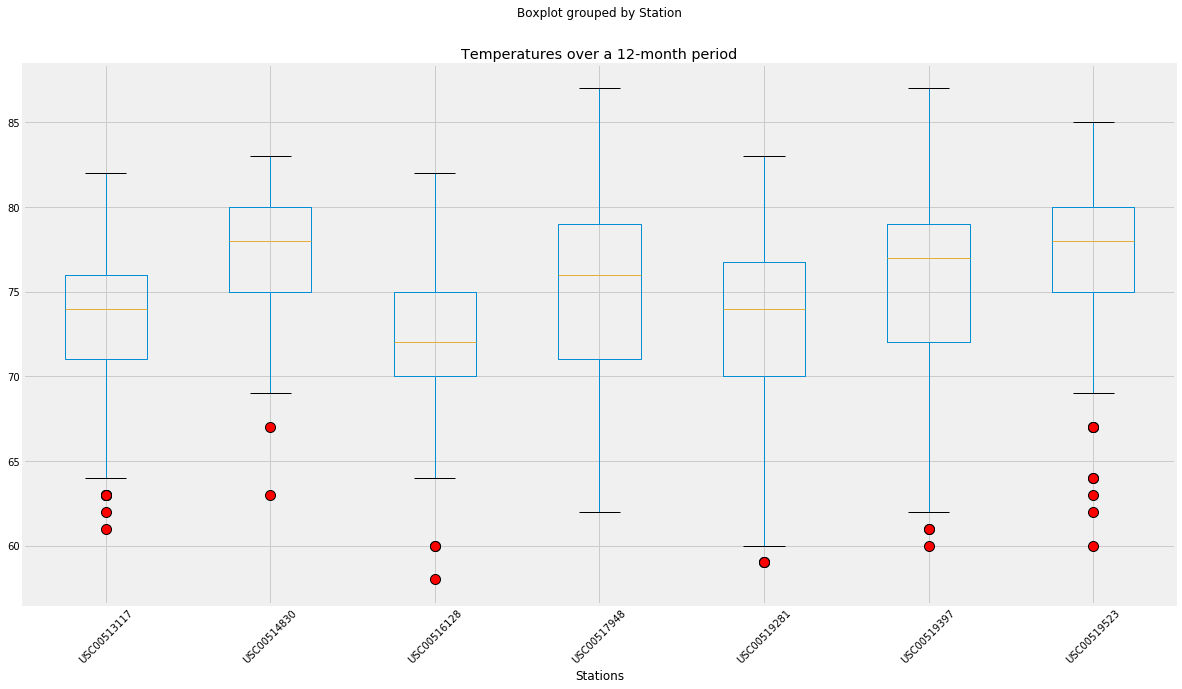

In [41]:
#Plotting a boxplot to have an understanding of the distribution of the datapoints from the median of all stations in quartiles.
#determine if there are any potential outliers across all the stations visually.
#
#I can see that there are multiple potential outliers in my temperature datapoints that could skew my data and further investigations 
#should be done.

date_tobs_total_df.boxplot(by='Station', figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))
plt.xticks(rotation = 45)
plt.xlabel('Stations')
plt.title('Temperatures over a 12-month period')
plt.savefig('Temperatures over a 12-month period')

# Close session

In [42]:
# Close Session
session.close()